In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [285]:
df = pd.read_csv('input/train.csv')

In [286]:
df['moving_ave'] = df['count'].rolling(window=7, center=True).mean()
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = pd.to_datetime(df['datetime']).dt.strftime('%Y')
df['month'] = pd.to_datetime(df['datetime']).dt.strftime('%m')
df['day'] = pd.to_datetime(df['datetime']).dt.strftime('%d')
df['weekday'] = pd.to_datetime(df['datetime']).dt.strftime('%a')
df['hour'] = pd.to_datetime(df['datetime']).dt.strftime('%H')
df.dropna(inplace=True)
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'moving_ave', 'year', 'month', 'day', 'weekday', 'hour'],
      dtype='object')

In [288]:
df = df[
    [
        'temp',    
        # 'humidity',
        # 'windspeed',
        'holiday',
        'workingday',
        'weather',
        # 'month',
        # 'weekday',
        'hour',
        'count',
        'moving_ave',
    ]
]

In [289]:
df = pd.get_dummies(df, columns=[
    # 'month',
    # 'weekday',
    'hour',
    'weather',
])

In [290]:
y = df.loc[:,["count"]].values
df.drop(['count'], axis=1, inplace=True)
X = df.values

In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train = y_train.ravel()   # 1    2d array -> 1d array 
y_test  = y_test.ravel()    # 2    2d array -> 1d array 

In [292]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model = model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

import lightgbm as lgb
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [293]:
# スコアを表示。小さいほどよい
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [294]:
# from sklearn.linear_model import Lasso                         # LASSO回帰のクラスを読み込み
# model = Lasso(alpha=1)                                # LASSO回帰のインスタンスを生成
# model = model_lasso.fit(X_train, y_train)                                      # データを学習させる
# y_pred = model.predict(X_test)

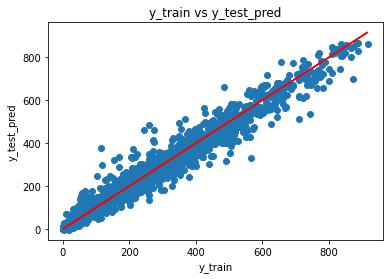

In [295]:
# 散布図を描画(真値 vs 予測値)
plt.plot(y_test, y_test, color = 'red', label = 'x=y') # 直線y = x (真値と予測値が同じ場合は直線状に点がプロットされる)
plt.scatter(y_test, y_pred) # 散布図のプロット
plt.xlabel('y_train') # x軸ラベル
plt.ylabel('y_test_pred') # y軸ラベル
plt.title('y_train vs y_test_pred') # グラフタイトル
plt.show()

In [296]:
print("test score: ",rmsle(y_test, model.predict(X_test)))
print("train score: ",rmsle(y_train, model.predict(X_train)))

test score:  0.3182096821120333
train score:  0.2864887117715495


In [297]:
y_t = pd.DataFrame(model.predict(X_train))
y_t.describe()

,0
count,7616.000000
mean,189.231224
std,177.624166
min,-1.666064
25%,42.341873
50%,142.312686
75%,278.959234
max,888.867339


In [298]:
y_p = pd.DataFrame(model.predict(X_test))
y_p.describe()

,0
count,3264.000000
mean,196.935108
std,179.042644
min,-4.752082
25%,47.588447
50%,152.671975
75%,295.035620
max,869.306297


In [299]:
y_p

,0
0,35.698395
1,501.247518
2,60.854453
3,246.734185
4,220.917137
...,...
3259,299.964023
3260,6.263979
3261,11.300194
3262,146.876165


In [300]:
y_p.loc[y_p[0]<0].count()

0    9
dtype: int64